In [1]:
from PIL import Image
from scipy import ndimage
from scipy.ndimage import filters
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def correlation(img,win):
    conv_img = np.zeros(img.shape)
    for h in range(img.shape[0]-2):
            for w in range(img.shape[1]-2):
                vert_start = h
                vert_end =  h + win.shape[0] 
                horiz_start =  w
                horiz_end =  w + win.shape[1]
                new_slice = img[vert_start:vert_end,horiz_start:horiz_end]
                out = new_slice*win
                conv_img[h][w] = np.sum(out)
    return conv_img

In [3]:
def findDerivative(img):
    sigma = 3
    dx = np.zeros((img.shape[0]-1,img.shape[1]-1))
    sobel_x = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
    dx = correlation(img,sobel_x)
    dy = np.zeros((img.shape[0]-1,img.shape[1]-1))
    sobel_y = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
    dy = correlation(img,sobel_y)
    A = (ndimage.uniform_filter(dx*dx,size=9))*9
    C = (ndimage.uniform_filter(dy*dy,size=9))*9
    B = (ndimage.uniform_filter(dx*dy,size=9))*9
    return A,C,B

In [10]:
def Shi_Thomasi_detector(A,C,B,img,threshold,half_win_size):
    lamb_1 = 1/2*( (A + C) + np.sqrt(4*B*B + (A - C)**2) )
    lamb_2 = 1/2*( (A + C) - np.sqrt(4*B*B + (A - C)**2) )
    l_min = np.zeros((img.shape[0],img.shape[1]))
    l_min = np.minimum(lamb_1,lamb_2)
    positions = np.argwhere(l_min > threshold)
    l_values = [l_min[p[0],p[1]] for p in positions]
    #finding local maximum
    l_values = np.argsort(l_values)
    win = np.zeros(l_min.shape)
    win[half_win_size:-half_win_size,half_win_size:-half_win_size] = 1
    final_positions = []
    for i in l_values:
        if(win[positions[i,0],positions[i,1]] == 1):
            win[(positions[i,0]-half_win_size):(positions[i,0]+half_win_size),
                (positions[i,1]-half_win_size):(positions[i,1]+half_win_size)] = 0
            final_positions.append(positions[i])
    return final_positions

In [5]:
def outputPlot(final_positions,img,case):
    plt.figure(1)
    if case == 1:
        plt.title('Shi_Thomasi_corner_detector')
    if case == 2:
        plt.title('Harris_corner_detector')
    plt.imshow(img,cmap='gray')
    plt.plot([p[1] for p in final_positions],[p[0] for p in final_positions], 'r.')
    plt.show()

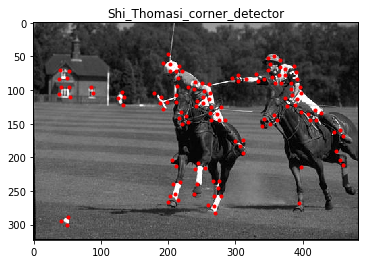

In [28]:
img1 = Image.open('HW1_Q2/Image3.jpg')
img1 = np.array(img1.convert('L'))
img1 = np.pad(img1, ((1,1), (1,1)), 'constant', constant_values = (0,0))
img1 = img1/255
A,C,B = findDerivative(img1)
final_positions = Shi_Thomasi_detector(A,C,B,img1,threshold=2,half_win_size=8)
outputPlot(final_positions,img1,case=1)

In [12]:
def Harris_detector(A,C,B,img,alpha,threshold,win_size):
    lamb_1 = 1/2*( (A + C) + np.sqrt(4*B*B + (A - C)**2) )
    lamb_2 = 1/2*( (A + C) - np.sqrt(4*B*B + (A - C)**2) )
    f = np.zeros(img.shape)
    f = (lamb_1*lamb_2)-alpha*((lamb_1+lamb_2)**2)
    positions = np.argwhere(f > threshold)
    f_values = [f[p[0],p[1]] for p in positions]
    f_values = np.argsort(f_values)
    # print(l_values)
    win = np.zeros(f.shape)
    win[7:-7,7:-7] = 1
    #print(win)
    final_positions = []
    for i in f_values:
        if(win[positions[i,0],positions[i,1]] == 1):
            win[(positions[i,0]-win_size):(positions[i,0]+win_size),
                (positions[i,1]-win_size):(positions[i,1]+win_size)] = 0
            final_positions.append(positions[i])
    return final_positions

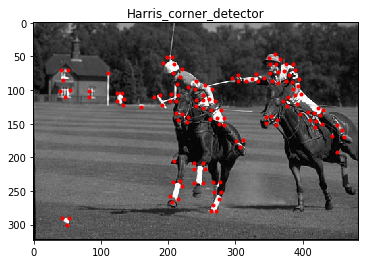

In [26]:
img1 = Image.open('HW1_Q2/Image3.jpg')
img1 = img1.convert('L')
img1 = np.array(img1)
img1 = np.pad(img1, ((1,1), (1,1)), 'constant', constant_values = (0,0))
img1 = img1/255
A,C,B = findDerivative(img1)
final_positions = Harris_detector(A,C,B,img1,alpha=0.02,threshold=10,win_size=8)
outputPlot(final_positions,img1,case=2)